#### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <u>Data Exploration</u>

In [1]:
import pandas as pd
df=pd.read_csv('/kaggle/input/glass/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
for j in df.columns:
    print(j, "has following unique values", df[j].unique())
    print("")

RI has following unique values [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.5

In [3]:
df.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [4]:
print("Duplicate values: ", df.duplicated().sum())
print("Length of dataset:", len(df))

Duplicate values:  1
Length of dataset: 214


In [5]:
df.drop_duplicates(inplace=True)
print("Length of dataset:", len(df))

Length of dataset: 213


In [6]:
df['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

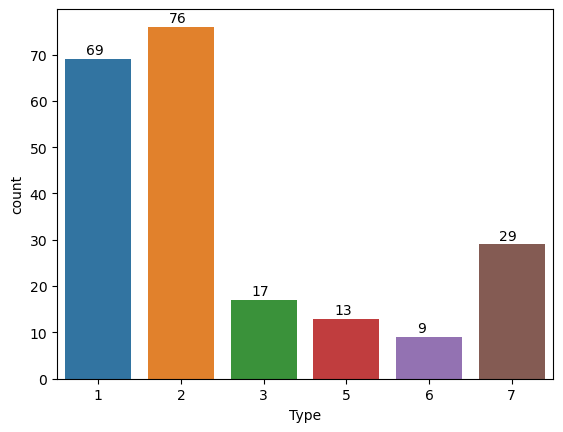

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Type", data=df)
count=0
for j in list(df['Type'].unique()):
    count=count+1
    plt.text(count-1.15, df['Type'].value_counts()[j]+1,df['Type'].value_counts()[j])

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:>

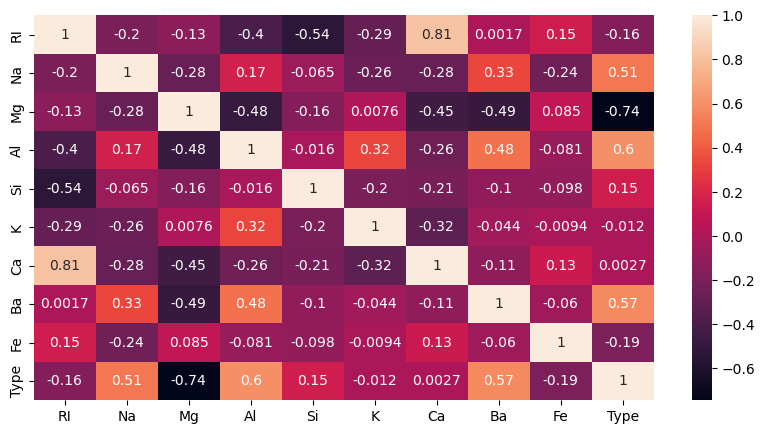

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

# <u>Machine Learning</u>

In [10]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [11]:
x.shape, y.shape

((213, 9), (213,))

In [12]:
# Oversampling
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)

In [13]:
xo.shape, yo.shape

((456, 9), (456,))

In [14]:
pd.DataFrame(yo).value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
dtype: int64

In [15]:
#splitting test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xo,yo,test_size=0.20,random_state=1)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((364, 9), (92, 9), (364,), (92,))

In [17]:
import numpy as np
np.arange(0,9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

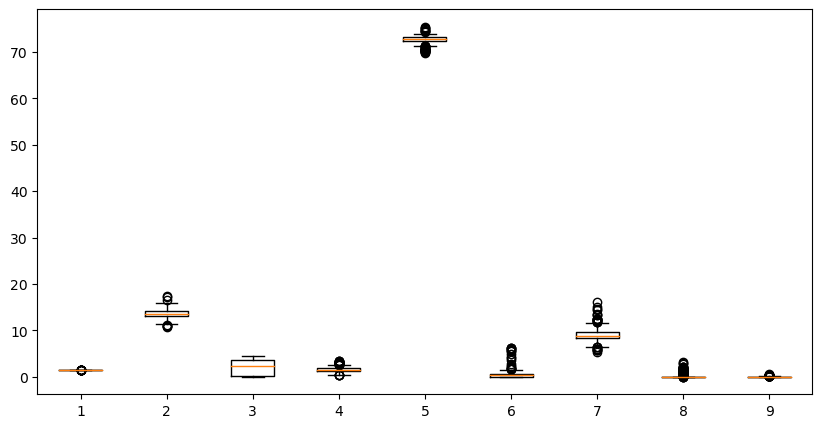

In [18]:
import numpy as np

list_cols=[]
for j in np.arange(0, 9):
    list_cols.append(xo[:,j])

plt.figure(figsize=(10, 5))
plt.boxplot(list_cols)
plt.show()

In [19]:
#normalization using standard scalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [20]:
#KNN model creation
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred= model.predict(x_test)
y_pred

array([1, 3, 5, 3, 3, 6, 6, 7, 7, 2, 5, 6, 5, 7, 1, 5, 1, 5, 1, 6, 3, 5,
       5, 1, 1, 7, 1, 3, 7, 1, 2, 1, 6, 3, 5, 7, 3, 5, 1, 3, 1, 3, 5, 3,
       6, 5, 2, 5, 6, 1, 5, 7, 3, 7, 7, 6, 7, 3, 5, 5, 2, 3, 5, 6, 3, 6,
       5, 6, 3, 5, 7, 5, 1, 6, 7, 5, 1, 7, 6, 7, 1, 3, 6, 2, 2, 5, 1, 3,
       6, 1, 1, 3])

# <u>Performance Evaluation</u>

In [22]:
#importing evaluation metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[12,  0,  3,  0,  0,  0],
       [ 2,  6,  1,  0,  1,  0],
       [ 1,  0, 14,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0],
       [ 0,  0,  0,  0, 14,  0],
       [ 3,  0,  0,  1,  0, 14]])

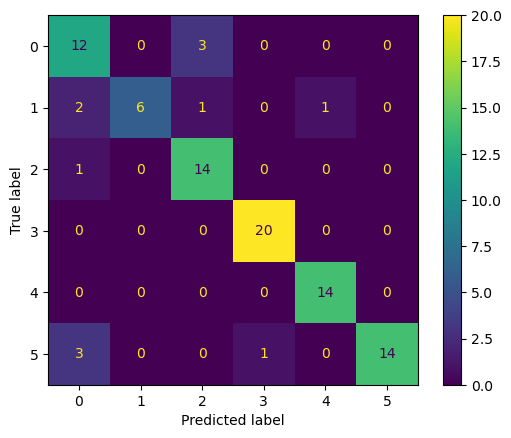

In [23]:
cmd=ConfusionMatrixDisplay(matrix)
cmd.plot()

In [24]:
score=accuracy_score(y_test,y_pred)
print('the accuracy of this model is: ',score)

the accuracy of this model is:  0.8695652173913043
